### Introduction of AlexNet

>AlexNet was designed by Hinton, winner of the 2012 ImageNet competition, and his student Alex Krizhevsky. It was also after that year that more and deeper neural networks were proposed, such as the VGG, GoogleLeNet etc. Its official data model has an accuracy rate of 57.1% and top 1-5 reaches 80.2%. This is already quite outstanding for traditional machine learning classification algorithms. This architecture also introduced Dropout, Data Augmentation and Regularisation.


![title](img/alexnet2.png)


The structure of vanilla AlexNet is explained in detail in the MNIST implementation. 

For more details on structure of this AlexNet for Dog Cat classification, kindly refer to model summary below.

### Code Implementation

In [0]:
GOOGLE_COLAB = True

if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/')
    path = "/content/drive/My Drive/dog_cat_input/"

    
training_data_dir = path + "train/train" # 10 000 * 2
validation_data_dir = path + "train/train" # 2 500 * 2
test_data_dir = path + "test1/test1" # 12 500

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
print(os.listdir("/content/drive/My Drive/dog_cat_input"))

Using TensorFlow backend.


['train', 'test1']


In [0]:
IMAGE_WIDTH=128  # The Conv2d function requires same dimensions for all the data samples
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [0]:
# preparing the training data

filenames = os.listdir(training_data_dir + "/")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [0]:
df.head()

,filename,category
0,cat.9077.jpg,0
1,cat.9074.jpg,0
2,cat.9087.jpg,0
3,cat.9108.jpg,0
4,cat.9069.jpg,0


In [0]:
df.tail()

,filename,category
24995,dog.10871.jpg,1
24996,dog.10897.jpg,1
24997,dog.1093.jpg,1
24998,dog.1090.jpg,1
24999,dog.10910.jpg,1


In [0]:
df.sample(5)

,filename,category
12883,cat.10313.jpg,0
5811,cat.5326.jpg,0
23995,dog.11800.jpg,1
23178,dog.11084.jpg,1
13078,dog.8700.jpg,1


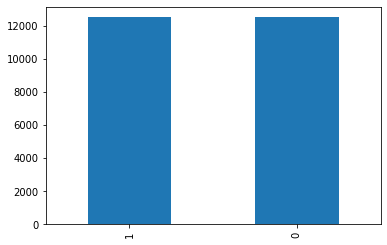

In [0]:
df["category"].value_counts().plot.bar()

In [0]:
df.shape

(25000, 2)

So out of 25000 train data, we have 12500 dogs images and 12500 cats images. The data is balanced.

Text(0.5, 1.0, 'cat.3774.jpg')

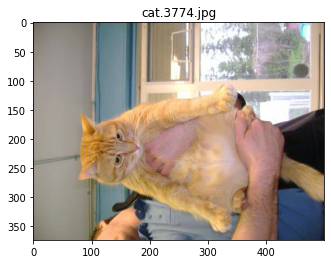

In [0]:
# Let us preview a sample image

preview = random.choice(filenames)
img = load_img("/content/drive/My Drive/dog_cat_input/train/train/" + preview)
plt.imshow(img)
plt.title(preview)

We can preview a lovely cat here.

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()


# Layer 1
model.add(Conv2D(64, kernel_size = (11, 11), activation = "relu", input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))
         

# Layer 2
model.add(Conv2D(128, kernel_size = (5, 5), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3

model.add(Conv2D(256, kernel_size = (3, 3), activation = "relu", padding = "same"))

# Layer 4

model.add(Conv2D(512, kernel_size = (3, 3), activation = "relu", padding = "same"))


# Layer 5

model.add(Conv2D(512, kernel_size = (3, 3), activation = "relu", padding = "same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 6
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))

model.add(Dropout(0.5))

# Layer 7
model.add(Dense(2048, activation = "relu"))

model.add(Dropout(0.5))

# Layer 8
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss=keras.metrics.binary_crossentropy, optimizer= "SGD", metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 118, 118, 64)      23296     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 59, 59, 64)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 55, 55, 128)       204928    
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 27, 27, 128)       0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 27, 27, 256)       295168    
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 27, 27, 512)       1180160   
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 27, 27, 512)      

In [0]:
# We are choosing to reduce learning rate if the accuracy does not increase for 2 epochs.

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0000001)

In [0]:
# This will save the model after every 2 epochs

model_checkpoint = ModelCheckpoint('Dog_Cat0{epoch:02d}.h5',period=2,save_weights_only=False)

In [0]:
callbacks = [learning_rate_reduction, model_checkpoint]

To correctly identify every type of dog or cat image, we need to augment our train data. Thus, it will capture most of the possible variations (like a dog lying upwards).  

ImageDataGenerator generates batches of tensor image data with real-time data augmentation. A good desciption can be found at https://keras.io/api/preprocessing/image/

In [0]:
# Because we will use image genaretor with class_mode="categorical", 
# We need to convert column category into string. 
# Then ImageGenerator will convert it one-hot encoding which is good for our classification.
# So we will convert 1 to dog and 0 to cat.

df["category"] = df["category"].replace({0: 'cat', 1: 'dog'})

In [0]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [0]:
train_df.head()

,filename,category
0,dog.11197.jpg,dog
1,dog.11438.jpg,dog
2,cat.8227.jpg,cat
3,cat.10132.jpg,cat
4,cat.8649.jpg,cat


In [0]:
validate_df.head()

,filename,category
0,cat.4498.jpg,cat
1,dog.10009.jpg,dog
2,cat.161.jpg,cat
3,dog.9232.jpg,dog
4,dog.7798.jpg,dog


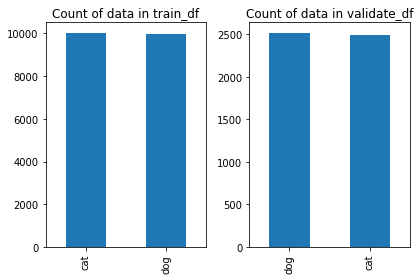

In [0]:
plt.subplot(1,2,1)
train_df['category'].value_counts().plot.bar()
plt.title("Count of data in train_df")

plt.subplot(1,2,2)
validate_df['category'].value_counts().plot.bar()
plt.title("Count of data in validate_df")

plt.tight_layout()

The data seems pretty balanced in both the sets.

In [0]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=12

print("Total data to train is {} and the total data to validate is {} with a batch size of {}."
      .format(total_train, total_validate, batch_size))

Total data to train is 20000 and the total data to validate is 5000 with a batch size of 12.


#### Training Data Generator

In [0]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    training_data_dir, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


#### Validation Data Generator

In [0]:
validation_datagen = ImageDataGenerator(rescale=1./255) # The ImageDataGenerator class can be used to rescale pixel values from
                                                        # the range of 0-255 to the range 0-1 preferred for neural networks.

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    validation_data_dir, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [0]:
# Let us check if our ImageDataGenerator is working correctly

example_df = train_df.sample(n=1)#.reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    training_data_dir, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


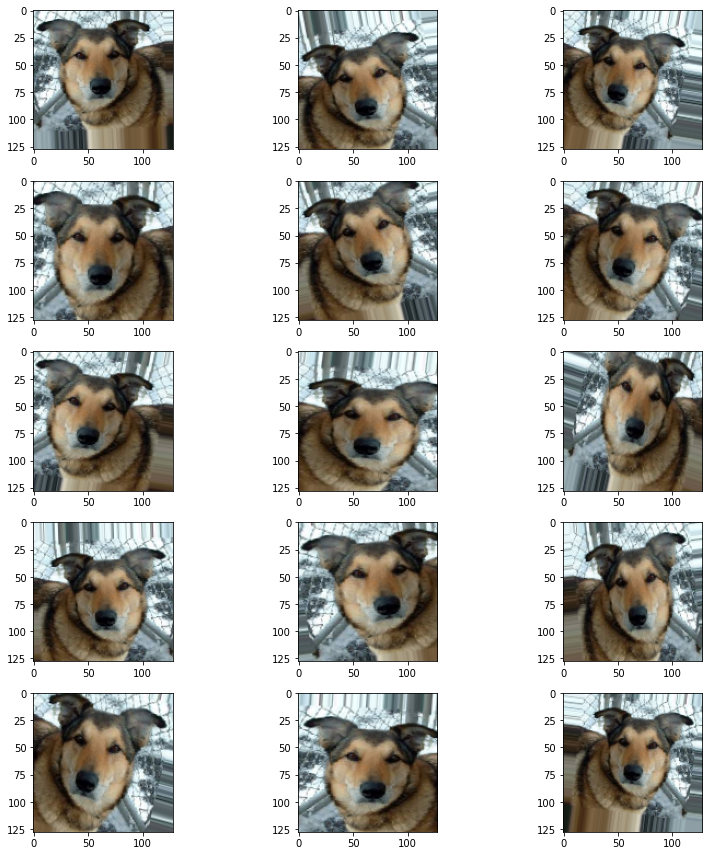

In [0]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break

plt.tight_layout()
plt.show()

Our ImageDataGenerator seems to work fine as it is giving results accordingly.

In [0]:
# Let us train and validate the model.

In [0]:
import math

In [69]:
# For an example, viualize the epochs = 5, steps_per epoch = 156 and batches = 128 as as of the step out of 156 step per epoch has 
# tensors of 128 batch size. i.e 1st step of 1st epoch has 128 batches, 2nd step of 1st epoch has 128 bacthes.......
# ... 156th step of 1st epoch has 128 batches i.e in total 156 * (128) = 20,000 training data is being fed in 1 epoch



history = model.fit_generator(
    train_generator, 
    epochs=20,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)


Epoch 1/20
1666/1666 [==============================] - 244s 146ms/step - loss: 0.6915 - accuracy: 0.5263 - val_loss: 0.6928 - val_accuracy: 0.6026
Epoch 2/20
1666/1666 [==============================] - 245s 147ms/step - loss: 0.6816 - accuracy: 0.5606 - val_loss: 0.6181 - val_accuracy: 0.6167
Epoch 3/20
1666/1666 [==============================] - 245s 147ms/step - loss: 0.6566 - accuracy: 0.6087 - val_loss: 0.6226 - val_accuracy: 0.6257
Epoch 4/20
1666/1666 [==============================] - 245s 147ms/step - loss: 0.6197 - accuracy: 0.6545 - val_loss: 0.5198 - val_accuracy: 0.7011
Epoch 5/20
1666/1666 [==============================] - 245s 147ms/step - loss: 0.5878 - accuracy: 0.6855 - val_loss: 0.4598 - val_accuracy: 0.7241
Epoch 6/20
1666/1666 [==============================] - 248s 149ms/step - loss: 0.5533 - accuracy: 0.7097 - val_loss: 0.5949 - val_accuracy: 0.7648
Epoch 7/20
1666/1666 [==============================] - 244s 146ms/step - loss: 0.5167 - accuracy: 0.7458 - val_

In [0]:
model.save_weights("ALexNet_dog_cat_model_weights.h5")

In [0]:
model.save("AlexNet_dog_cat_model.h5")

In [0]:
# We will continue the training for more epochs from the pre-trained and saved model.

new_model = keras.models.load_model('AlexNet_dog_cat_model.h5')


In [74]:

history = new_model.fit_generator(
    train_generator, 
    epochs=30,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)


Epoch 1/30
1666/1666 [==============================] - 249s 149ms/step - loss: 0.2865 - accuracy: 0.8774 - val_loss: 0.2697 - val_accuracy: 0.8706
Epoch 2/30
1666/1666 [==============================] - 245s 147ms/step - loss: 0.2857 - accuracy: 0.8774 - val_loss: 0.3812 - val_accuracy: 0.8937
Epoch 3/30
1666/1666 [==============================] - 246s 148ms/step - loss: 0.2756 - accuracy: 0.8834 - val_loss: 0.4672 - val_accuracy: 0.8847
Epoch 4/30
1666/1666 [==============================] - 250s 150ms/step - loss: 0.2781 - accuracy: 0.8816 - val_loss: 0.3887 - val_accuracy: 0.8877

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0012499999720603228.
Epoch 5/30
1666/1666 [==============================] - 246s 148ms/step - loss: 0.2588 - accuracy: 0.8906 - val_loss: 0.2486 - val_accuracy: 0.8955
Epoch 6/30
1666/1666 [==============================] - 251s 151ms/step - loss: 0.2555 - accuracy: 0.8907 - val_loss: 0.5429 - val_accuracy: 0.8931
Epoch 7/30
1666/1666 [=========

In [0]:
model.save("AlexNet_dog_cat_model.h5")

In [0]:
model.save_weights("ALexNet_dog_cat_model_weights_50epochs.h5")

#### Visualize training rate and validation rate

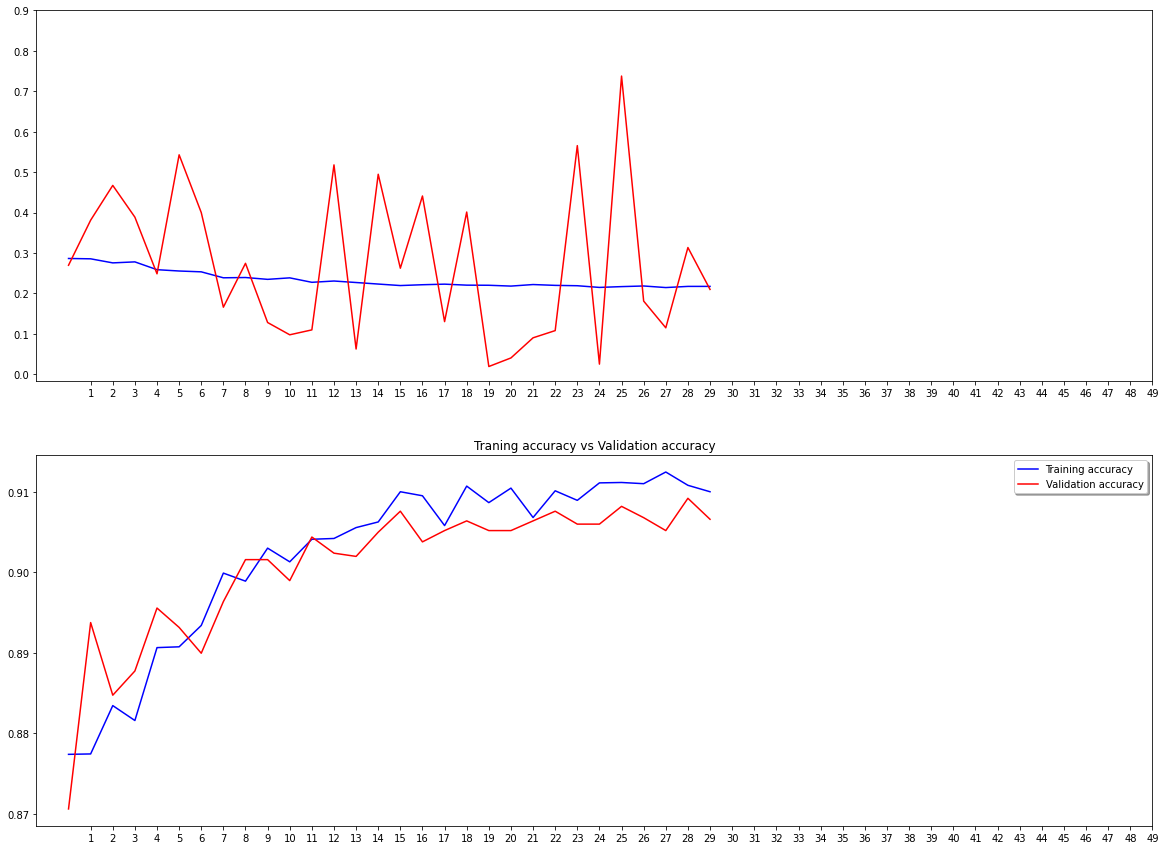

In [78]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20,15))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="Validation loss")
ax1.set_xticks(np.arange(1, 50, 1)) # 50 is the number of epochs
ax1.set_yticks(np.arange(0, 1, 0.1))
plt.title("Traning loss vs Validation loss")

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 50, 1)) # 50 is the number of epochs
plt.title("Traning accuracy vs Validation accuracy")

legend = plt.legend(loc='best', shadow=True)
#plt.tight_layout()
plt.show()

### Predict

In [80]:
# Preparing test data

test_filenames = os.listdir("/content/drive/My Drive/dog_cat_input/test1/test1/")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]
nb_samples

12500

In [83]:
# Creating testing generator

test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    test_data_dir, 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


In [0]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [0]:
# Since we know our cat class is 0 and dog class is 0, we can interpret the predicted value by comparing it with the
# default threshold

catg_list  = predict.copy()

for i in range(len(predict)):
  if predict[i] <= 0.5:
    catg_list[i] = 0   # for cat
  elif predict[i] > 0.5:
    catg_list[i] = 1   # fpr dog


In [112]:
np.unique(catg_list, return_counts=True)

(array([0., 1.], dtype=float32), array([6157, 6343]))

In [ ]:
# THE BELOW COMMENTED LINES CAN BE USED IN CASE WE USE CATEGORICAL_CROSSENTROPY AND SOFTMAX FUNCTION.

In [0]:
# Since we have categorical classication, the prediction will come with probability of each category from which we can 
# select the one with highest probablity

In [0]:
# test_df['category'] = np.argmax(predict, axis=-1)

In [0]:
# We will convert the predict category back into our generator classes by using train_generator.class_indices.

# label_map = dict((v,k) for k,v in train_generator.class_indices.items())
# test_df['category'] = test_df['category'].replace(label_map)


In [0]:
test_df["category"] = catg_list.astype(int)

In [0]:
# {1: 'dog', 0: 'cat'} as we did in training.
# The below step will be useful when we want to check the accuracy

# test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

Text(0.5, 1.0, 'Stats of predicted test_data')

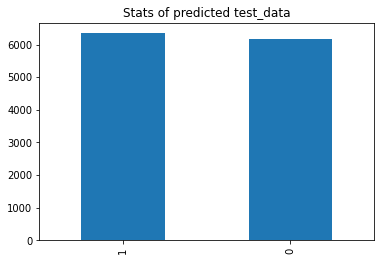

In [117]:
# Visualize the results

test_df['category'].value_counts().plot.bar()
plt.title("Stats of predicted test_data")

In [0]:
# Since we do not have the labels for test data, we cannot calculate the accuracy. However,let us check some of the samples.

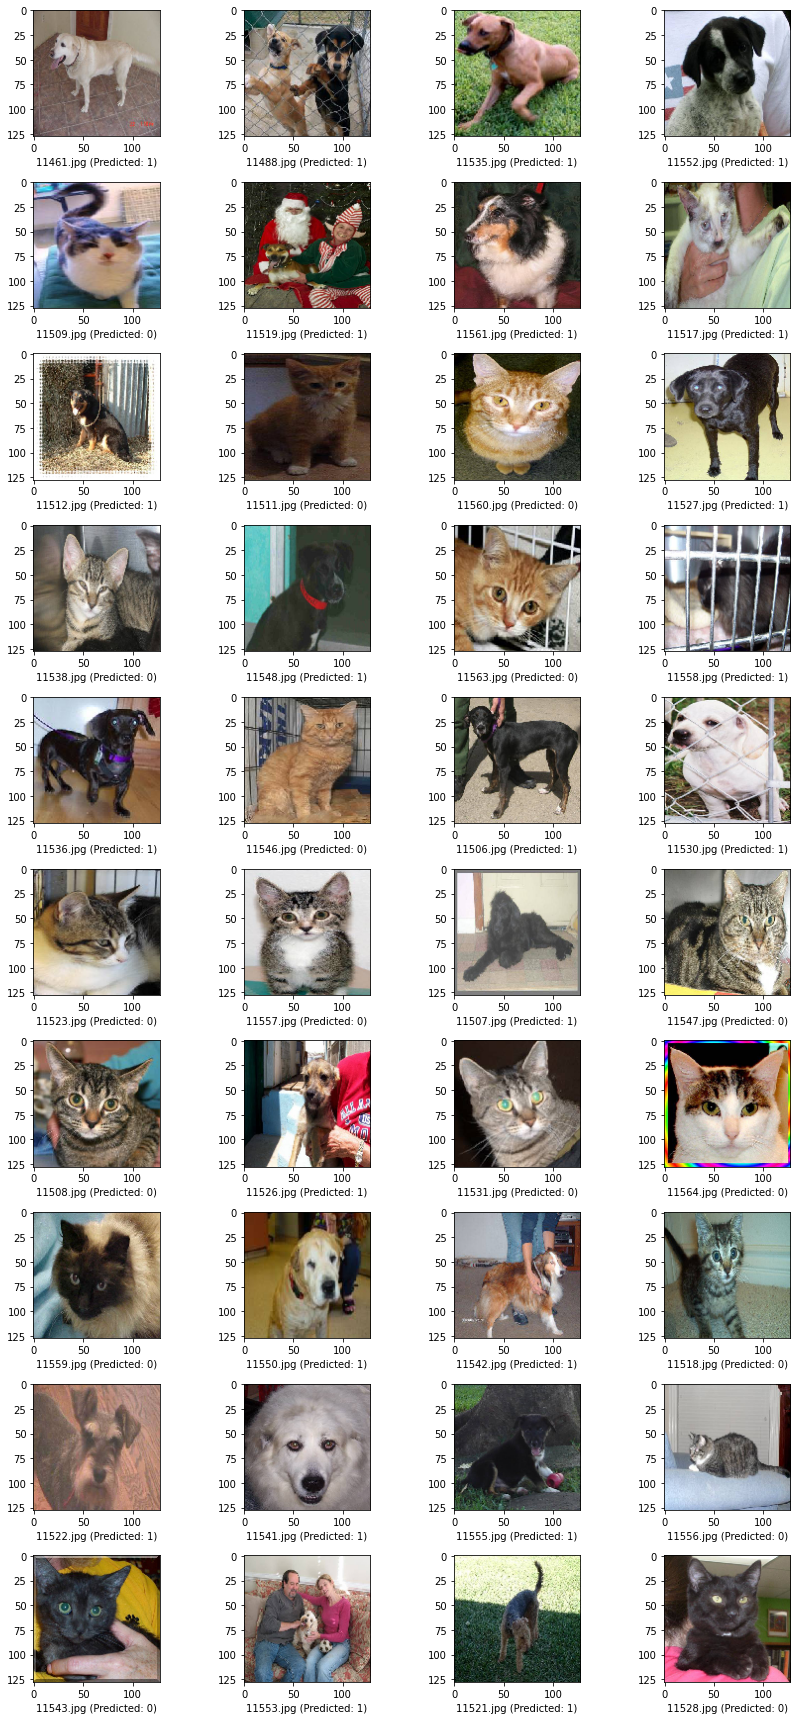

In [120]:
sample_test = test_df.head(40)
# sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/content/drive/My Drive/dog_cat_input/test1/test1/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(10, 4, index+1)
    plt.imshow(img)
    plt.xlabel(filename + ' (' + "Predicted: {}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [ ]:
# As can be seen, our model is able to classify the images quite fairly well.